In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [54]:
df = pd.read_csv("Video Games Sales.csv")

In [55]:
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [57]:
#sjekker for missing values
df.isnull().sum().sort_values(ascending= False)

Year             29
Publisher         2
index             0
Rank              0
Game Title        0
Platform          0
Genre             0
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [58]:
#erstatter tomme verdier med median og mode
df['Year'] = df['Year'].fillna(df['Year']).median()
df['Publisher'] = df['Publisher'].fillna("Missing")


In [59]:
#sjekker for missing values etter fylt inn
df.isnull().sum().sort_values(ascending= False)

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

['The Sims', 'N S U ', 'N S U ', 'M H F ', 'Battlefield 3', 'FIFA Soccer 12']


C:\Users\ikong\AppData\Local\Temp\ipykernel_6780\2163818983.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df.head(100)[df["Publisher"] == "Electronic Arts"]


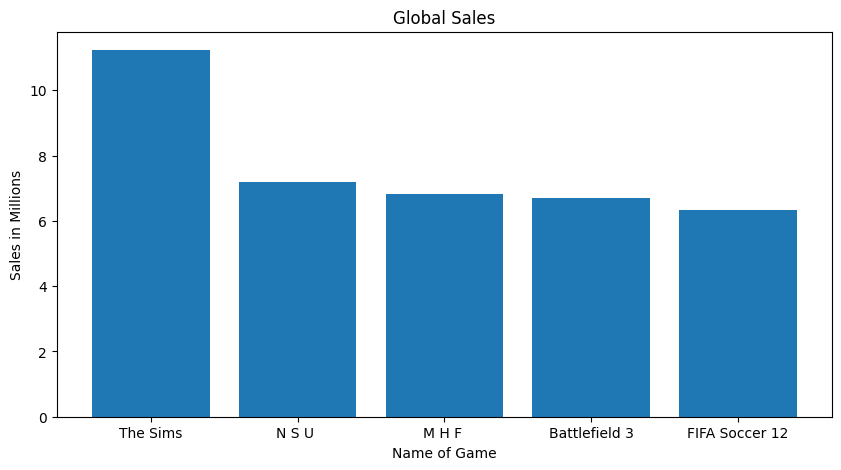

In [95]:
#plotter de fem største salgene til Electronic Arts

df_temp = df.head(100)[df["Publisher"] == "Electronic Arts"]

game_titles= []
for title in df_temp["Game Title"]:
    new_title= ""
    if len(title) >= 15:
        title = [char for char in title if char.isupper()]
        for char in title:
            new_title += f"{char} "         
        game_titles.append(new_title)
    else:
        game_titles.append(title)
        

plt.figure(figsize =(10,5))

plt.bar(game_titles, df_temp["Global"] )

plt.title("Global Sales")
plt.xlabel("Name of Game")
plt.ylabel("Sales in Millions")
plt.show()

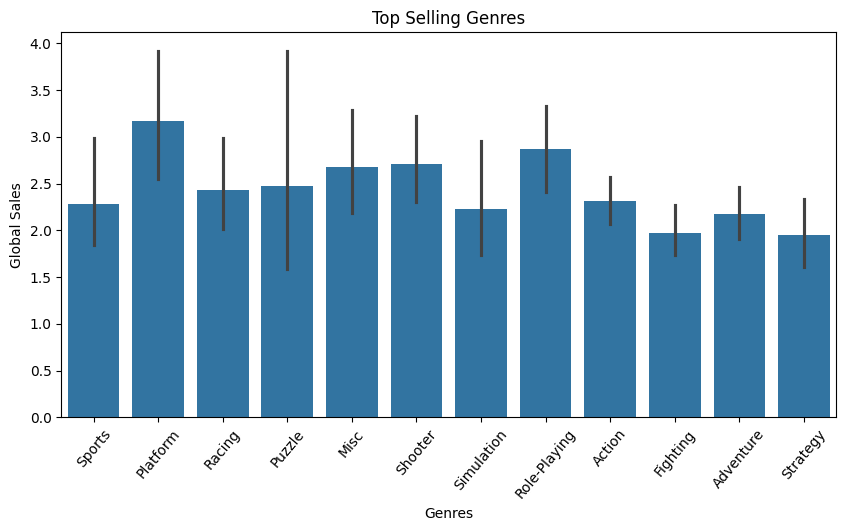

In [96]:
#sammenhengen mellom sjanger og globale salg
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y="Global", data=df)
plt.title("Top Selling Genres")
plt.xlabel("Genres")
plt.ylabel("Global Sales")
plt.xticks(rotation=50)
plt.show()